## **Customer Personality Analysis**

**Problem Statement:**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers.
It helps a business to better understand its customers and makes it easier for them to
modify products according to the specific needs, behaviors and concerns of different
types of customers. Customer personality analysis helps a business to modify its
product based on its target customers from different types of customer segments. For
example, instead of spending money to market a new product to every customer in the
company’s database, a company can analyze which customer segment is most likely
to buy the product and then market the product only on that particular segment.

**Importing Necessary Packages:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

**Importing and reading the data set:**

In [4]:
from google.colab import files
files.upload()

Saving marketing_campaign11.csv to marketing_campaign11.csv


{'marketing_campaign11.csv': b'ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response\r\n5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1\r\n2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0\r\n4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0\r\n6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0\r\n5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0\r\n7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11

In [5]:
##Reading the data

df=pd.read_csv('/content/marketing_campaign11.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
#Summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
# Data types of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Checking for Null Values if any:**

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Observation:** There are 24 Nan values in the Income column only, replaces them by the median/mean value of that feature.

In [9]:
median = df['Income'].median()
df = df.fillna(median)

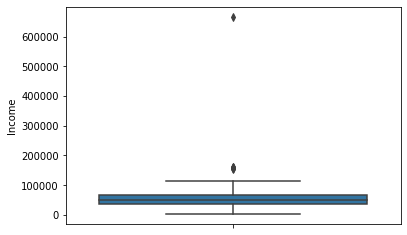

In [10]:
sns.boxplot(y=df['Income'])

**Observation:** Income feature contains outliers(an extreme outlier value ofabove lakhs), here the outliers are replaced with the medain value of the feature

In [11]:
# standard deviation of Income Feature

std = df['Income'].std()
outliers = (df['Income'] - median).abs() > 3*std


#df.Income.replace(to_replace = outliers,value = median,inplace=True)
df.loc[outliers,'Income'] = median

**Duplicates removing in the data if any:**

In [12]:
#finding duplicates if any

df[df.duplicated(['ID'])].size

0

**Observation:**There is no duplicates in the data set

**Note:** On observing the data type of each features, the Dt_Customer is not in a date format, it is in Object type.

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
mindate=df['Dt_Customer'].min()
df['Dt_Customer'] = (df['Dt_Customer']-mindate).dt.days

In [14]:
#Marital_Status replacings

df.Marital_Status.replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'}
                            ,inplace=True)

**Exploratory Data Analysis:**

In [15]:
#listing the columns 

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Checking if the amount of ones in the AcceptedCmpX columns was the same in the Response column.

In [16]:
df.groupby(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
              'AcceptedCmp5']).agg({'Response':['count','sum']})

Response     
                                                                    count  sum
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5              
0            0            0            0            0                1777  146
                                                    1                  59   21
                                       1            0                  84   11
                                                    1                  24   12
                          1            0            0                 129   55
                                                    1                   6    2
             1            0            0            0                   1    1
                                       1            0                   8    3
                                                    1                   4    2
                          1            0            0                   2    0
                                                    1                   2    2
1            0            0            0            0                  52   13
                                                    1                  21   14
                                       1            0                  14    6
                                                    1                  23   19
                          1            0            0                   8    5
                                                    1                  13   10
             1            0            1            0                   2    2
                                                    1                   8    7
                          1            0            1                   3    3

**Observation**: 146 out of 1777 clients, that had never accepted a single offer from the previous campaigns, accepted the offer in the last campaign. We also have clients that accepted multiple offers (Cmp1 and Cmp5, Cmp1 and Cmp4, Cmp1 and Cmp3, Cmp1 and Cmp2 and Cmp4, Cmp1 and Cmp3 and Cmp5) and some of them did not accepted the last offer.

In [17]:
df.groupby(['Complain']).agg({'Complain':'count'})

,Complain
Complain,
0,2219
1,21


**Observation**: The Complain column does not appear to bring much to the modeling, since less than 1%(21) of the clients complained.

**Plotting the Histogram of Features:**

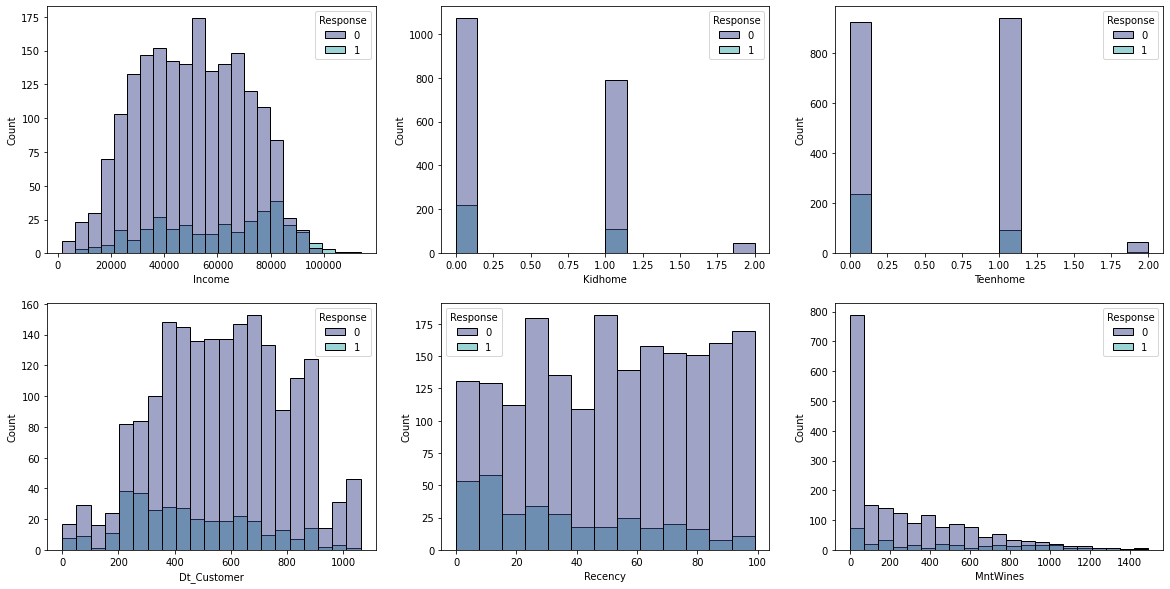

In [56]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = df.columns

a = 0

for i in cols[2:8]:
  sns.histplot(data = df, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1

The first histogram, picturing the income profile of the dataset. It looks like the higher income, the higher is the chance of purchasing the gadget.

The Dt_Customer histogram: that it remained almost constant. The company was able to attract the same number of clients over time. Interestingly, customers that subscribed earlier were more susceptible to accept the last offer.

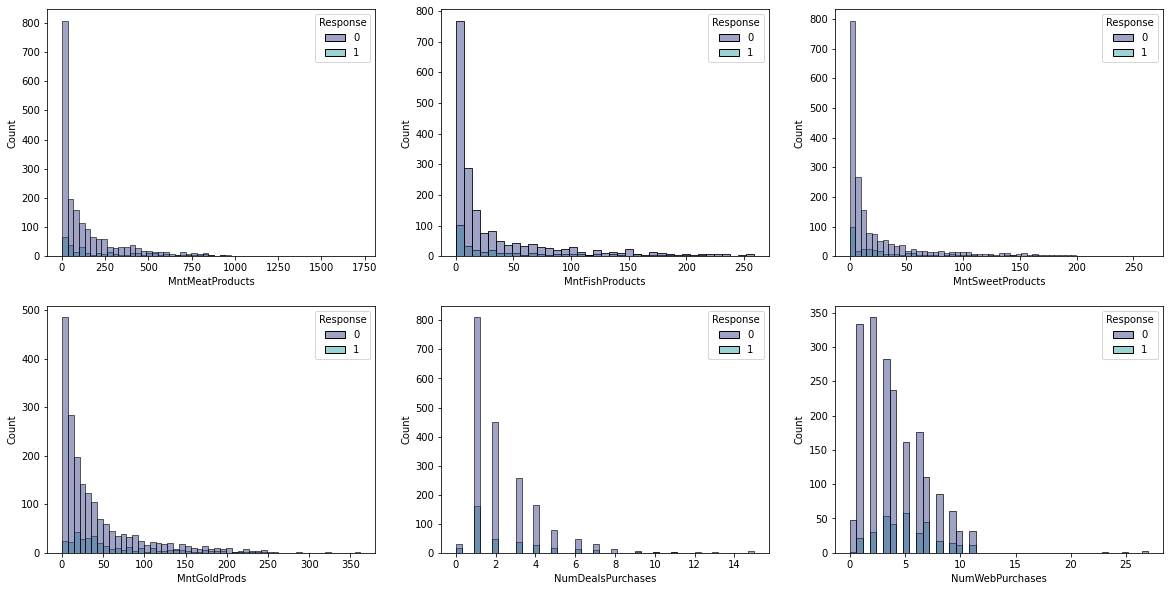

In [62]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

for i in cols[9:15]:
  sns.histplot(data = df, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,92,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,938,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,591,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,998,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,742,94,173,...,5,0,0,0,0,0,0,3,11,0


**Observation**: Marital Status and Education are categorical features and have to be transformed to a numerical. Using OneHotEncoder, which transforms categorical variables into columns that has only zeros and ones.

In [22]:
enc = OneHotEncoder(sparse = False)
Marit_Stat = df.groupby(['Marital_Status']).agg({'Marital_Status':'count'}).index
aux = enc.fit_transform(df[['Marital_Status']])
df[Marit_Stat] = aux[:,0:5]

df.drop(columns = ['Marital_Status'],inplace=True)

In [23]:
Educ = df.groupby(['Education']).agg({'Education':'count'}).index
aux = enc.fit_transform(df[['Education']])
df[Educ] = aux[:,0:5]
df.head(10)
df.drop(columns = ['Education'],inplace=True)

In [24]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Divorced,Married,Single,Together,Widow,2n Cycle,Basic,Graduation,Master,PhD
0,5524,1957,58138.0,0,0,92,58,635,88,546,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,1954,46344.0,1,1,938,38,11,1,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,1965,71613.0,0,0,591,26,426,49,127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,998,26,11,4,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,742,94,173,43,118,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD'],
      dtype='object')

**Modeling Excluding AcceptedCmpX (1,2,3,4 and 5):**

Since, that not all the clients were included in the last campaigns, so I decided to create classification models without the AcceptedCmpX features.

In [27]:
# columns not considered = ['Response','ID','Year_Birth',AcceptedCmp3',
      # 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']

      
lim_df = df[['Dt_Customer','Kidhome','Teenhome', 'Income', 'MntFishProducts',
               'MntMeatProducts', 'MntFruits','MntSweetProducts', 'MntWines',
               'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases', 
               'NumStorePurchases', 'NumWebPurchases','NumWebVisitsMonth', 
               'Recency', 'Divorced', 'Married', 'Single','Together', 'Widow',
               '2n Cycle', 'Basic', 'Graduation', 'Master','PhD']]

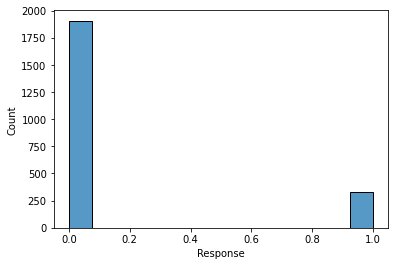

In [29]:
#distribution plot of respone column

sns.histplot(data = df.Response,palette = 'mako')

**Observation**: the data Response = 1 is very undersampled in comparison with Response = 0.

**Random Forest Model:**

In [30]:
def print_confMat (y,predictions,graph):
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1_0)+'; '+'f1_1 = '+"{:.2f}".format(f1_1)+'; '
  if graph:
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.grid(False); ax.set_title(text)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues,ax=ax)
    plt.show()
  else: return accuracy,f1_0,f1_1

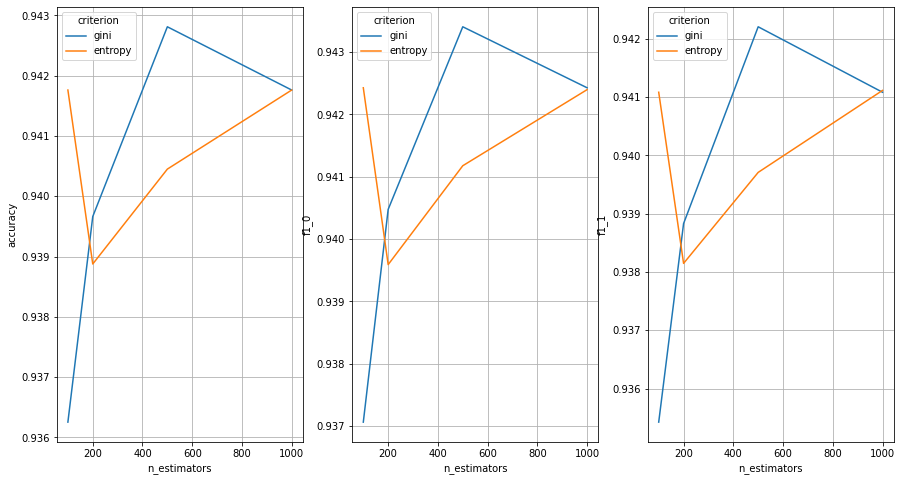

In [33]:
os = SMOTE(random_state=0, k_neighbors=5)
os_X,os_y =os.fit_resample(lim_df, df.Response)

cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,os_X,os_y.squeeze(),cv=10)
    accuracy, f1_0,f1_1 = print_confMat (os_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(15, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

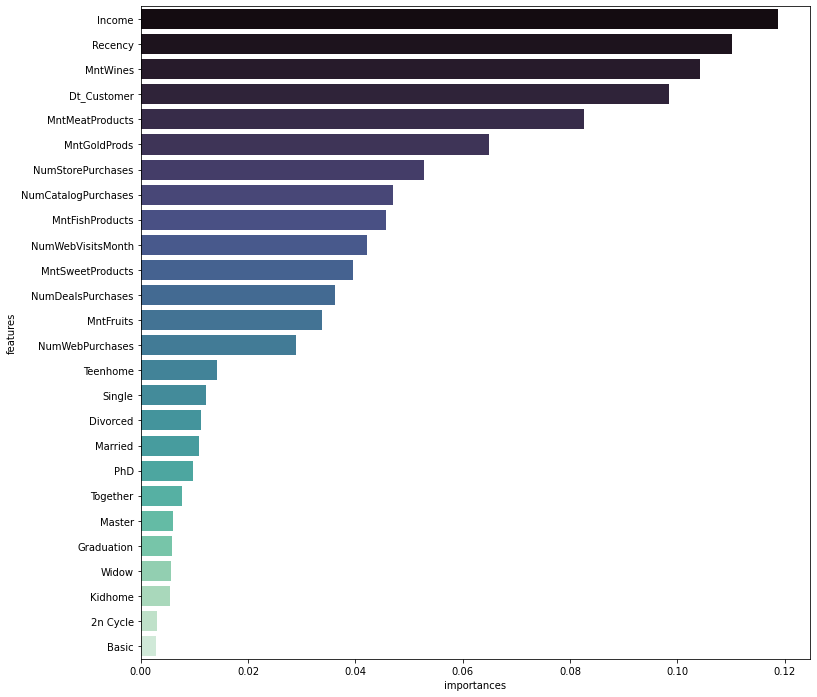

In [36]:
model = RandomForestRegressor(n_estimators=100,max_depth=50)
model.fit(lim_df,df.Response)
features = lim_df.columns
importances = model.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(12, 12));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'mako')

aux = rfc_imp.sort_values(by=['importances'],ascending=False)
rfc_feats = aux.features[:14].to_list()
rfc_df = lim_df[rfc_feats]

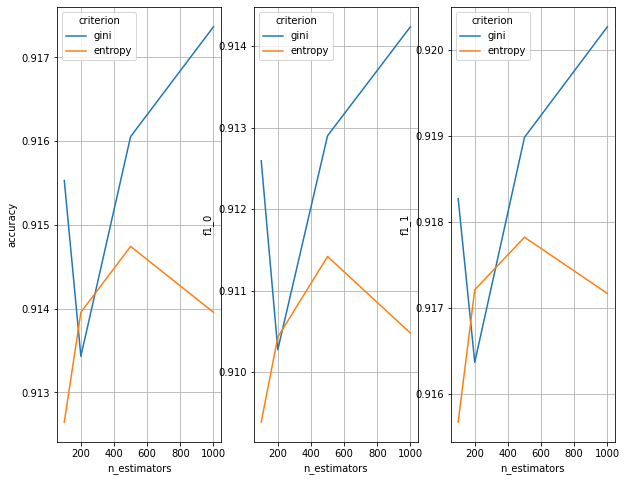

In [40]:
os = SMOTE(random_state=0, k_neighbors=5)
os_X,os_y =os.fit_resample(rfc_df, df.Response)

cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,os_X,os_y.squeeze(),cv=10)
    accuracy, f1_0,f1_1 = print_confMat (os_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

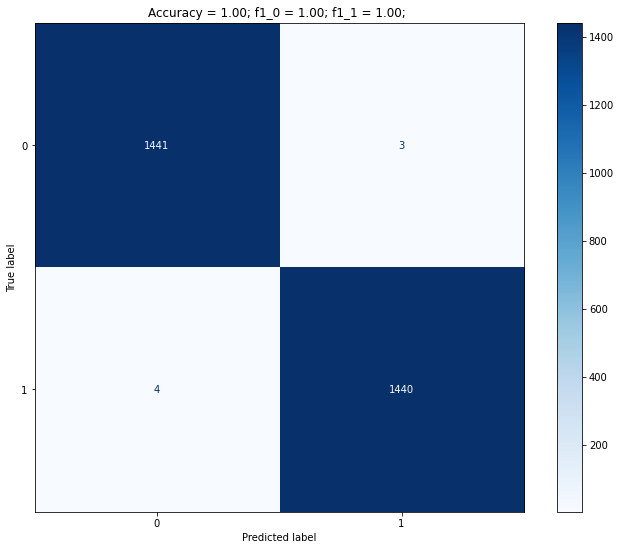

In [41]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(lim_df, df.Response, 
                                                    test_size=0.25, 
                                                    random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X,columns=columns )
y_train= pd.DataFrame(data=os_data_y,columns=['Response'])

rfc = RandomForestClassifier(n_estimators=500,criterion='gini',verbose=0,
                             random_state=1)
rfc.fit(os_data_X,os_data_y)
predictions = rfc.predict(os_data_X)
print_confMat (os_data_y,predictions,graph=1)

From the Confusion matrix plot above, we can see that the prediction for the oversampled train dataset was almost perfect. Let's check the test dataset.

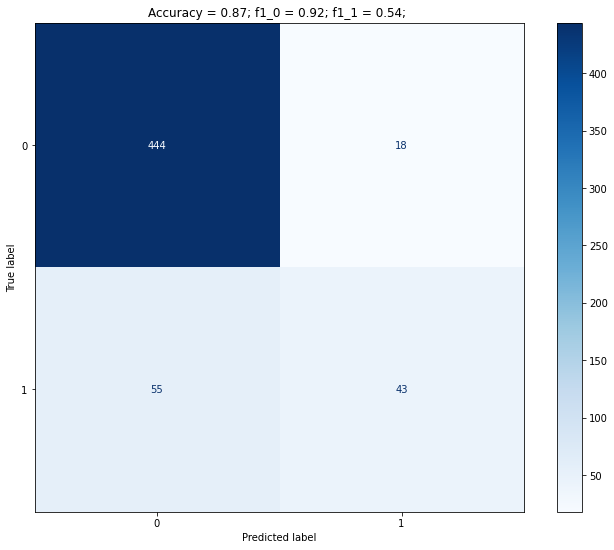

In [42]:
predictions = rfc.predict(X_test)
print_confMat (y_test,predictions,graph=1)

The Random Forest presented a high accuracy for the test dataset. The most problematic is to predict accurately the Response=1, but the results satisfactory. This could be a sign of model overfitting or an influence of the creation of synthetic samples by the SMOTE technique.

**Neglecting the imbalanced classes**

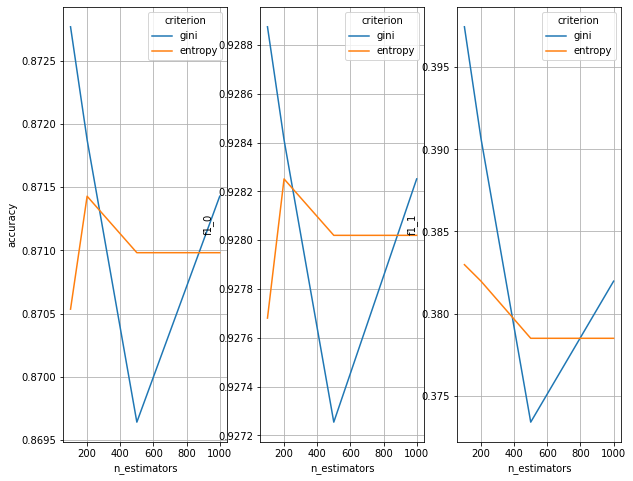

In [45]:
cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1,max_depth=15)
    predictions = cross_val_predict(rfc,lim_df,df.Response,cv=10)
    accuracy, f1_0,f1_1 = print_confMat (df.Response, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    
rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

**Undersampling with Condensed Nearest Neighbour:**

In [46]:
from imblearn.under_sampling import CondensedNearestNeighbour

CNN = CondensedNearestNeighbour(random_state=0, n_neighbors=9)

us_X,us_y = CNN.fit_resample(lim_df, df.Response)
us_X.shape

(775, 26)

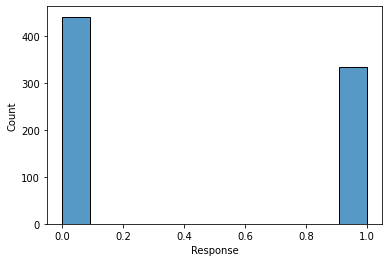

In [47]:
sns.histplot(data=us_y,palette='mako')

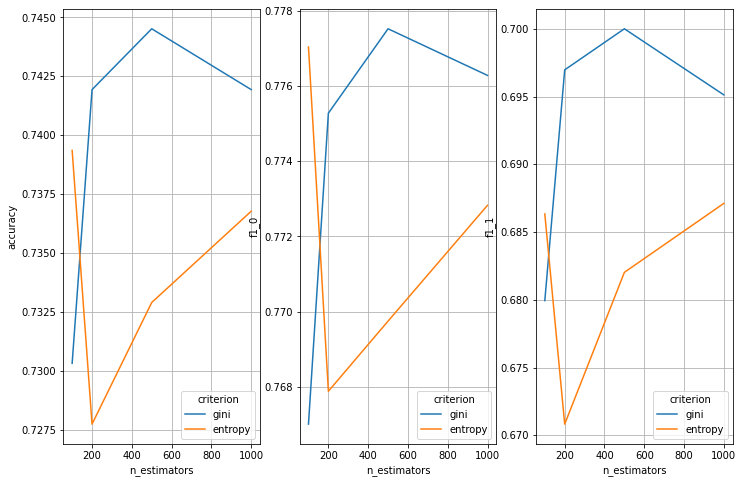

In [48]:
cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,us_X,us_y,cv=10)
    accuracy, f1_0,f1_1 = print_confMat (us_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(12, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

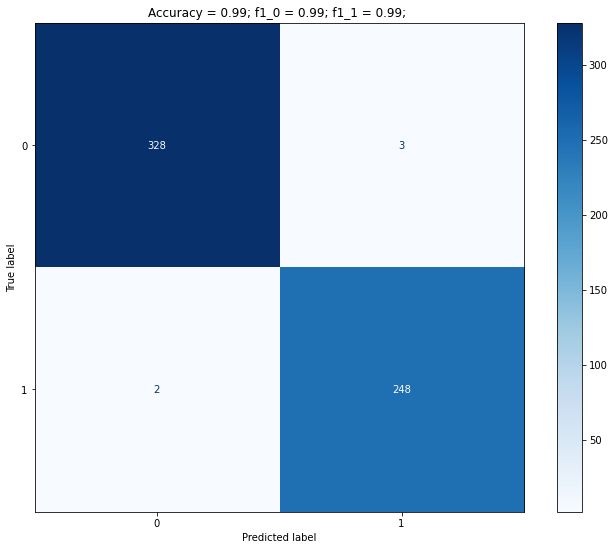

In [49]:
X_train, X_test, y_train, y_test = train_test_split(us_X, us_y, 
                                                    test_size=0.25, 
                                                    random_state=0)
# columns = X_train.columns
# os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# X_train = pd.DataFrame(data=os_data_X,columns=columns )
# y_train= pd.DataFrame(data=os_data_y,columns=['Response'])

rfc = RandomForestClassifier(n_estimators=1000,criterion='gini',verbose=0,
                             random_state=1)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_train)
print_confMat (y_train,predictions,graph=1)

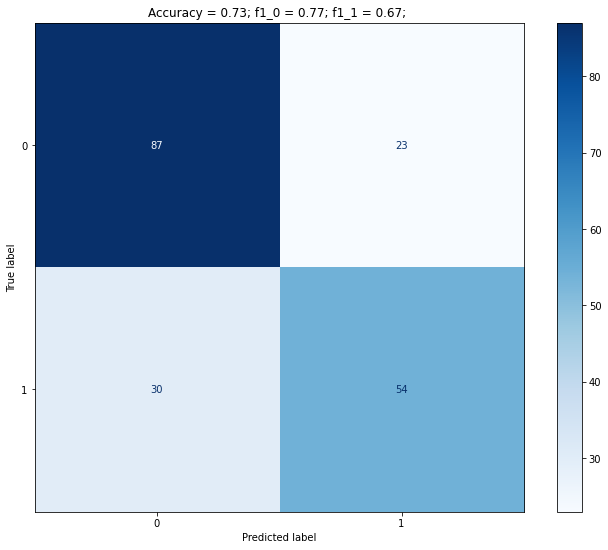

In [50]:
predictions = rfc.predict(X_test)
print_confMat (y_test,predictions,graph=1)